In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read csv of antismash data 
antismash = pd.read_csv("260923_antismash_protoclusters_MosAIC")

In [3]:
# information about the table 
print(antismash.shape)
print(antismash.columns)

(2655, 10)
Index(['sampleID', 'contignumber', 'regionnumber', 'category', 'contig_edge',
       'core_location', 'cutoff', 'detection_rule', 'product',
       'protocluster_number'],
      dtype='object')


##### Data information 
2655 values 
10 columns 

**Column names**
- 'sampleID', 'contignumber', 'regionnumber', 'category', 'contig_edge',
       'core_location', 'cutoff', 'detection_rule', 'product',
       'protocluster_number'
       

In [4]:
# summarise category
antismash[['sampleID', 'category']].groupby(['category']).count().reset_index()

,category,sampleID
0,NRPS,641
1,PKS,176
2,RiPP,677
3,other,877
4,saccharide,1
5,terpene,283


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


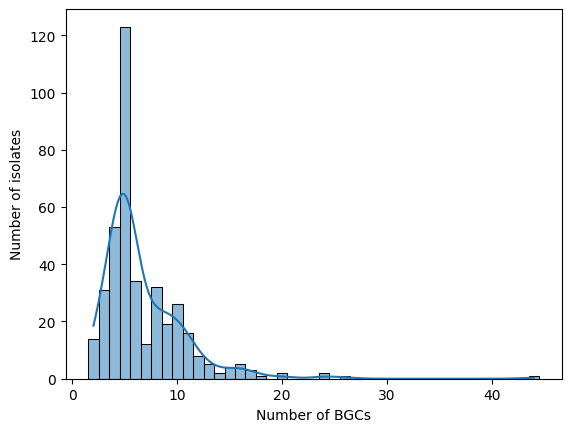

In [10]:
# number of biosynthetic gene clusters per sample 
agg_BGC_per_sample = antismash[['sampleID', 'category']].groupby('sampleID').count().reset_index().sort_values(by='category')
agg_BGC_per_sample

custom_bins = range(0, 40, 1)

ax = sns.histplot(data=agg_BGC_per_sample, x="category", bins = custom_bins, kde = True, discrete=True)
ax.set(xlabel='Number of BGCs', ylabel='Number of isolates')

plt.savefig("031023_number_of_BGCs_in_MosAIC.png", dpi = 600, bbox_inches = 'tight')



In [85]:
# summary statistics 
agg_BGC_per_sample.describe()


,category
count,394.000000
mean,6.738579
std,4.106122
min,2.000000
25%,5.000000
50%,5.000000
75%,8.000000
max,44.000000


### Thoughts 
Lowest number of BGCs = 2 
Highest number of BGCs = 44 
Average number (mean) = 7 
